In [ ]:
##### on command prompt 1.source environment ankit
#                 2. cd darkflow
  #               3. jupyter notebook (if using jupyter or otherwise does not use this line) 
#pjreddie.com/darknet/yolo/ #download voc2007 dataset from   http://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
#extract the file and copy and paste in darkflow folder
#while training new model

# do some changes bcoz simple person do not have a super computer so revome image and corresponding annotation xml file
#  from image folder and annotations folder in voc2007 folder  

#may be create ./ckpt (ckpt folder) folder in  darkflow
#python flow --model cfg/yolo.cfg --load bin/yolo.weights 
#--train --dataset "VOCdevkit/VOC2008/JPEGImages" --annotation "VOCdevkit/VOC2008/Annotations" --epoch 50


import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'



In [2]:
#https://github.com/thtrieu/darkflow/issues/256 ( using this issue  i got some idea like what is happening)

#https://github.com/thtrieu/darkflow/issues/560(using this i solve my problem like why i use checkpoint?)

# define the model options and run
#first run 
    #Export the model as a protobuff (.pb) file
    
    #flow --model cfg/yolo.cfg --load bin/yolo.weights --savepb
    
    #In your python code load the .pb and the .meta files
    
    #from darkflow.net.build import TFNet
    #options = {"metaLoad": "built_graph/yolo.meta", 
#              "pbLoad": "built_graph/yolo.pb",
 #               "threshold": 0.1,
  #              "gpu": 1.0}
    #tfnet = TFNet(options)
##


options = {
    'metaLoad':"built_graph/yolo.meta", 
    'pbLoad':"built_graph/yolo.pb",
    'threshold': 0.15,
    'gpu': 1.0
}

tfnet = TFNet(options)


Loading from .pb and .meta
GPU mode with 1.0 usage


In [7]:
# read the color image and convert to RGB

img = cv2.imread('/home/ankit/darkflow/VOCdevkit/VOC2007/JPEGImages/000002.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # for real world color
# use YOLO to predict the image

result = tfnet.return_predict(img)
result



[{'bottomright': {'x': 211, 'y': 296},
  'confidence': 0.8520114,
  'label': 'train',
  'topleft': {'x': 137, 'y': 199}}]

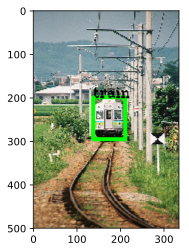

In [8]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img,label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0),2)
plt.imshow(img)
plt.show()